# IEOR 242 Final Project
Metrics for describing the data from the Pickle file.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

In [3]:
# Path to the Pickle file
PICKLE_FILE = 'reports_april_25_project.pickle'

## Data Loading
Read the dataframe with file contents and labels from a Pickle file.

In [4]:
class_df = pd.read_pickle(PICKLE_FILE)

print('Number of reports: %d' % len(class_df))
class_df.head()

Number of reports: 4068


,content,cik,year,quarter,subsector,name,tic,SALES_value,OIADP,AT,CEQ,SALES,INTAN,ROE,OIADP_change,AT_change,CEQ_change,SALES_change,INTAN_change,ROE_change
0,Item Management s Discussion and Analysis of ...,855654.0,2012.0,3.0,35201010.0,IMMUNOGEN INC,IMGN,3.252,pos,neg,neg,neg,NA,pos,19.308,-8.160,-16.883,-9.225,0.000,43.542
1,The following discussion and analysis provide...,788920.0,2011.0,3.0,35101010.0,PRO-DEX INC/CO,PDEX,6.876,neg,pos,pos,neg,NA,neg,-14.519,6.611,11.238,-1.891,0.000,-23.155
2,Item Managements Discussion and Analysis of...,795551.0,2011.0,1.0,35101010.0,THERAGENICS CORP,TGX,20.253,pos,pos,pos,pos,neg,pos,50.771,1.415,1.731,6.335,-6.162,48.205
3,Managements Discussion and Analysis of Financ...,352915.0,2012.0,1.0,35102020.0,UNIVERSAL HEALTH SVCS INC,UHS,1755.536,neg,neg,pos,neg,neg,neg,-4.086,-0.316,4.514,-1.882,-0.727,-8.229
4,Item Managements Discussion and Analysis of...,1027915.0,2010.0,1.0,NaN,None,None,14.887,pos,pos,pos,pos,neg,neg,16.123,3.150,16.311,5.018,-0.296,-0.162


In [5]:
# Number of companies
len(class_df['cik'].unique())

1091

     year  content
0  2009.0       18
1  2010.0      789
2  2011.0      747
3  2012.0      746
4  2013.0      731
5  2014.0      783
6  2015.0      254


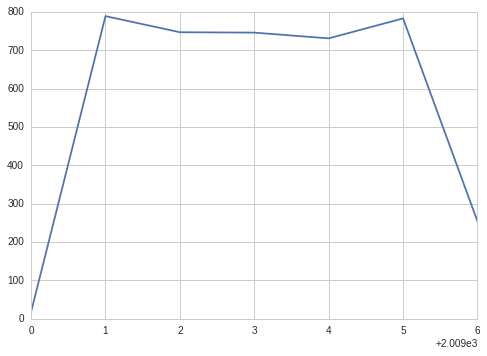

In [16]:
# Number of reports over the years
year_count = class_df.groupby('year').count()
year_count = year_count.reset_index()
print(year_count[['year', 'content']])
plt.plot(year_count['year'], year_count['content'])

In [7]:
# Replace subsector codes with subsector names
class_df['Subsector Name'] = np.nan
class_df['Subsector Name'].categories = ['Biotechnology', 'Health Care Equipment', 'Pharmaceuticals',
                                         'Health Care Services', 'Health Care Supplies',
                                         'Life Sciences Tools & Services', 'Health Care Technology',
                                         'Health Care Facilities', 'Health Care Distributors', 'Managed Health Care']
class_df.loc[class_df['subsector'] == 35201010.0, 'Subsector Name'] = 'Biotechnology'
class_df.loc[class_df['subsector'] == 35101010.0, 'Subsector Name'] = 'Health Care Equipment'
class_df.loc[class_df['subsector'] == 35202010.0, 'Subsector Name'] = 'Pharmaceuticals'
class_df.loc[class_df['subsector'] == 35102015.0, 'Subsector Name'] = 'Health Care Services'
class_df.loc[class_df['subsector'] == 35101020.0, 'Subsector Name'] = 'Health Care Supplies'
class_df.loc[class_df['subsector'] == 35203010.0, 'Subsector Name'] = 'Life Sciences Tools & Services'
class_df.loc[class_df['subsector'] == 35103010.0, 'Subsector Name'] = 'Health Care Technology'
class_df.loc[class_df['subsector'] == 35102020.0, 'Subsector Name'] = 'Health Care Facilities'
class_df.loc[class_df['subsector'] == 35102010.0, 'Subsector Name'] = 'Health Care Distributors'
class_df.loc[class_df['subsector'] == 35102030.0, 'Subsector Name'] = 'Managed Health Care'
class_df.head()

,content,cik,year,quarter,subsector,name,tic,SALES_value,OIADP,AT,...,SALES,INTAN,ROE,OIADP_change,AT_change,CEQ_change,SALES_change,INTAN_change,ROE_change,Subsector Name
0,Item Management s Discussion and Analysis of ...,855654.0,2012.0,3.0,35201010.0,IMMUNOGEN INC,IMGN,3.252,pos,neg,...,neg,NA,pos,19.308,-8.160,-16.883,-9.225,0.000,43.542,Biotechnology
1,The following discussion and analysis provide...,788920.0,2011.0,3.0,35101010.0,PRO-DEX INC/CO,PDEX,6.876,neg,pos,...,neg,NA,neg,-14.519,6.611,11.238,-1.891,0.000,-23.155,Health Care Equipment
2,Item Managements Discussion and Analysis of...,795551.0,2011.0,1.0,35101010.0,THERAGENICS CORP,TGX,20.253,pos,pos,...,pos,neg,pos,50.771,1.415,1.731,6.335,-6.162,48.205,Health Care Equipment
3,Managements Discussion and Analysis of Financ...,352915.0,2012.0,1.0,35102020.0,UNIVERSAL HEALTH SVCS INC,UHS,1755.536,neg,neg,...,neg,neg,neg,-4.086,-0.316,4.514,-1.882,-0.727,-8.229,Health Care Facilities
4,Item Managements Discussion and Analysis of...,1027915.0,2010.0,1.0,NaN,None,None,14.887,pos,pos,...,pos,neg,neg,16.123,3.150,16.311,5.018,-0.296,-0.162,NaN


/home/stefan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


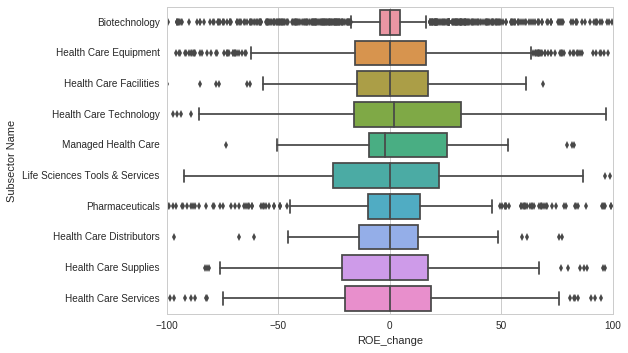

In [8]:
# Change in ROE per subsector
data_subsec = class_df
data_subsec['ROE_change'] = data_subsec['ROE_change'].convert_objects(convert_numeric=True)
data_subsec = data_subsec[(data_subsec['ROE_change'] > -100) & (data_subsec['ROE_change'] < 100)]
sns.boxplot(x='ROE_change', y='Subsector Name', data=data_subsec)

/home/stefan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


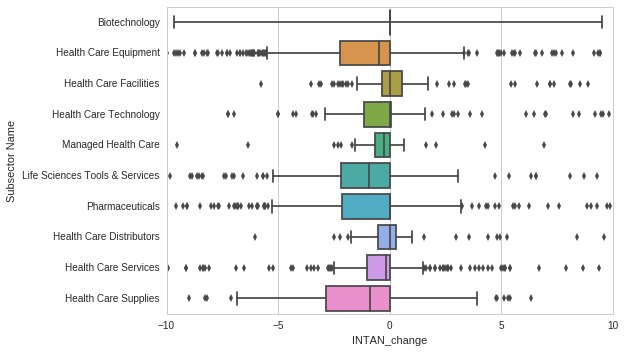

In [9]:
# Change in intangible assets per subsector
data_subsec = class_df
data_subsec['INTAN_change'] = data_subsec['INTAN_change'].convert_objects(convert_numeric=True)
data_subsec = data_subsec[(data_subsec['INTAN_change'] > -10) & (data_subsec['INTAN_change'] < 10)]
sns.boxplot(x='INTAN_change', y='Subsector Name', data=data_subsec)

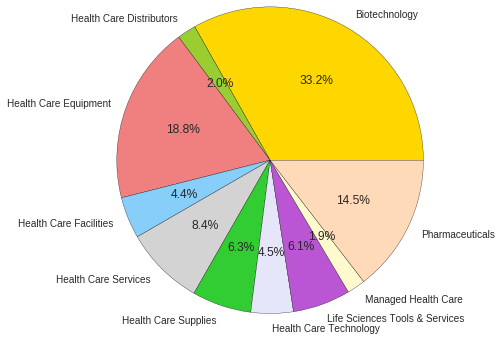

In [10]:
# Number of reports per subsector
subsec_count = class_df.groupby('Subsector Name').count()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgray', 'limegreen', 'lavender',
          'mediumorchid', 'lemonchiffon', 'peachpuff']
plt.pie(subsec_count['content'], labels=subsec_count.index, autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.show()

/home/stefan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()
/home/stefan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/home/stefan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/home/stefan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/home/stefan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: convert_objects is deprecated.  

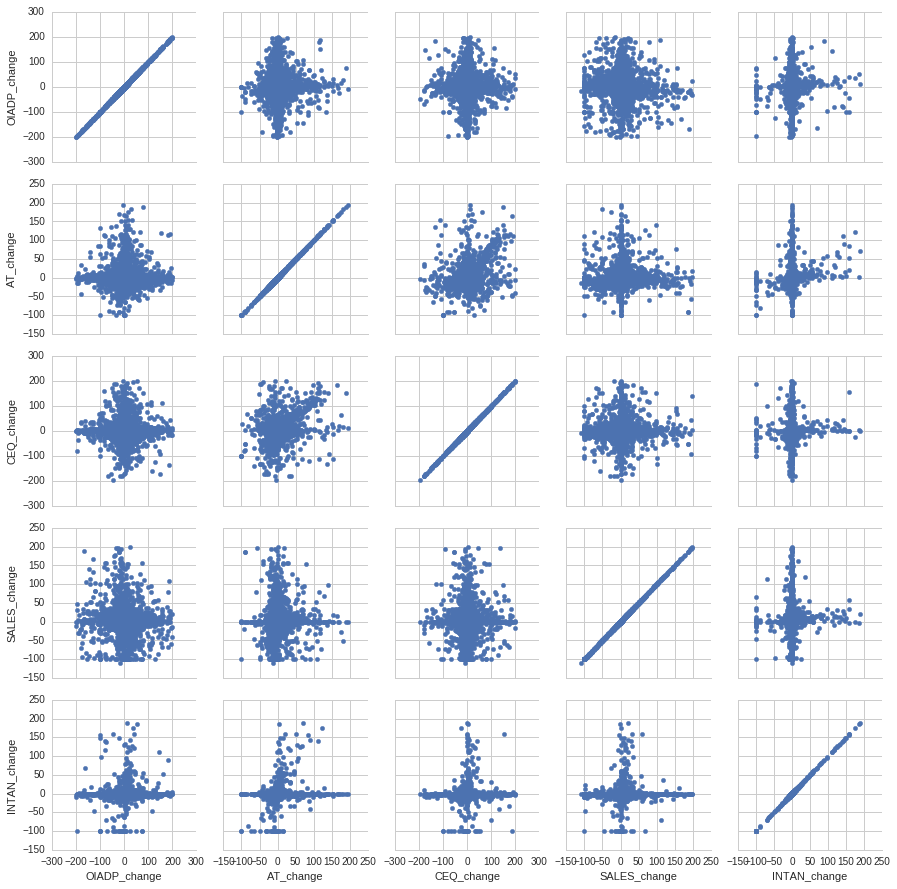

In [11]:
# Correlation matrix plot for all financial features
fin_change_corr = class_df[['OIADP_change', 'AT_change', 'CEQ_change', 'SALES_change', 'INTAN_change']].dropna(axis=0, how='any')
fin_change_corr['OIADP_change'] = fin_change_corr['OIADP_change'].convert_objects(convert_numeric=True)
fin_change_corr = fin_change_corr[(fin_change_corr['OIADP_change'] > -200) & (fin_change_corr['OIADP_change'] < 200)]
fin_change_corr['AT_change'] = fin_change_corr['AT_change'].convert_objects(convert_numeric=True)
fin_change_corr = fin_change_corr[(fin_change_corr['AT_change'] > -200) & (fin_change_corr['AT_change'] < 200)]
fin_change_corr['CEQ_change'] = fin_change_corr['CEQ_change'].convert_objects(convert_numeric=True)
fin_change_corr = fin_change_corr[(fin_change_corr['CEQ_change'] > -200) & (fin_change_corr['CEQ_change'] < 200)]
fin_change_corr['SALES_change'] = fin_change_corr['SALES_change'].convert_objects(convert_numeric=True)
fin_change_corr = fin_change_corr[(fin_change_corr['SALES_change'] > -200) & (fin_change_corr['SALES_change'] < 200)]
fin_change_corr['INTAN_change'] = fin_change_corr['INTAN_change'].convert_objects(convert_numeric=True)
fin_change_corr = fin_change_corr[(fin_change_corr['INTAN_change'] > -200) & (fin_change_corr['INTAN_change'] < 200)]
g = sns.PairGrid(fin_change_corr)
g = g.map(plt.scatter)